In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
dir1 = 'result/20241029_181328/'
dir2 = 'result/20241029_165319/'
dir3 = 'result/20241029_172944/'

In [74]:
# 関数: windowsize に基づいて平均と標準偏差を計算
def mean_std(data, column, window_size=10):
    # 全てのウィンドウの平均と標準偏差を格納するリスト
    mean_list = []
    std_list = []
    
    # ウィンドウごとに平均と標準偏差を計算
    for start in range(0, len(data), window_size):
        # 現在のウィンドウの範囲
        window_data = data[column][start:start + window_size]
        
        # ウィンドウ内の平均と標準偏差を計算
        mean_list.append(window_data.mean())
        std_list.append(window_data.std())
    
    return mean_list, std_list

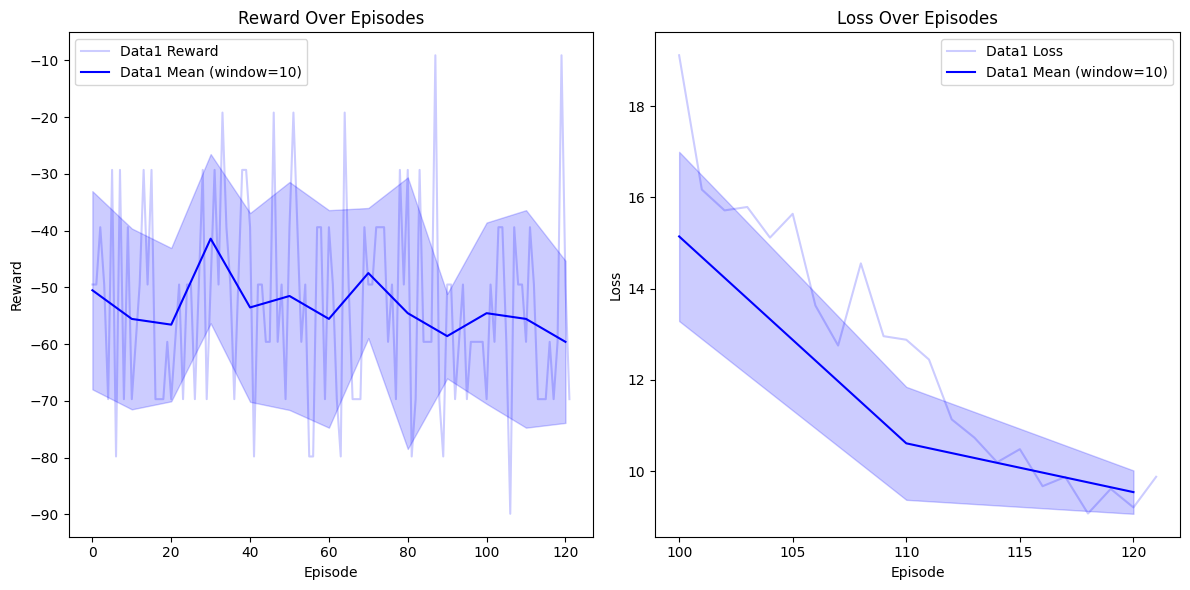

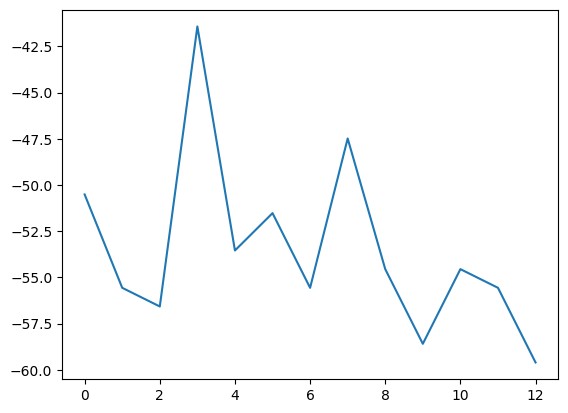

In [75]:
# Load data
data1 = pd.read_csv(dir1 + 'ep_log.csv')
# data2 = pd.read_csv(dir2 + 'ep_log.csv')
# data3 = pd.read_csv(dir3 + 'ep_log.csv')

window_size = 10

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# List of dataframes and their corresponding colors
data_list = [
    (data1, 'blue', 'Data1'), 
    # (data2, 'green', 'Data2'), 
    # (data3, 'red', 'Data3')
    ]

# Plot reward and loss for each dataset
for data, color, label in data_list:
    # data = data[data['loss']>=0].reset_index(drop=True)
    reward_mean, reward_std = mean_std(data, 'reward', window_size)
    loss_mean, loss_std = mean_std(data, 'loss', window_size)
    
    # Plot raw reward and fixed window mean/std for reward
    axes[0].plot(data['reward'], label=f'{label} Reward', color=color, alpha=0.2)
    axes[0].plot(range(0, len(data), window_size), reward_mean, label=f'{label} Mean (window={window_size})', color=color)
    axes[0].fill_between(range(0, len(data), window_size), 
                         [m - s for m, s in zip(reward_mean, reward_std)], 
                         [m + s for m, s in zip(reward_mean, reward_std)], 
                         color=color, alpha=0.2)
    
    # Plot raw loss and fixed window mean/std for loss
    axes[1].plot(data['loss'], label=f'{label} Loss', color=color, alpha=0.2)
    axes[1].plot(range(0, len(data), window_size), loss_mean, label=f'{label} Mean (window={window_size})', color=color)
    axes[1].fill_between(range(0, len(data), window_size), 
                         [m - s for m, s in zip(loss_mean, loss_std)], 
                         [m + s for m, s in zip(loss_mean, loss_std)], 
                         color=color, alpha=0.2)

# Set titles and labels for reward plot
axes[0].set_title('Reward Over Episodes')
axes[0].set_xlabel('Episode')
axes[0].set_ylabel('Reward')
axes[0].legend()

# Set titles and labels for loss plot
axes[1].set_title('Loss Over Episodes')
axes[1].set_xlabel('Episode')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()
plt.plot(reward_mean)